#**Hands-on Activity 10.1 Data Analysis using Python**



```
Jhillian M. Cabos                                                        CPE22S3
```



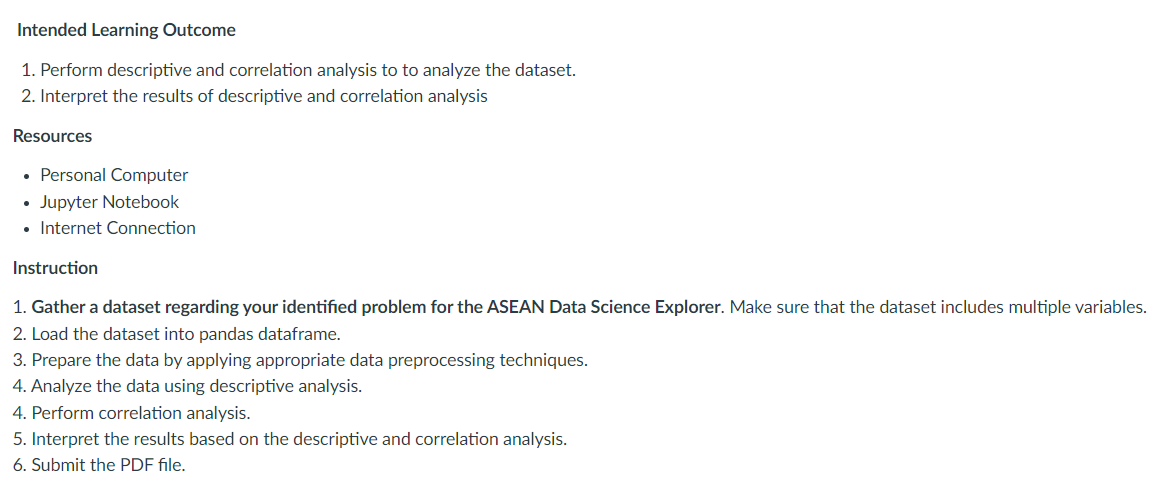

#About the Dataset

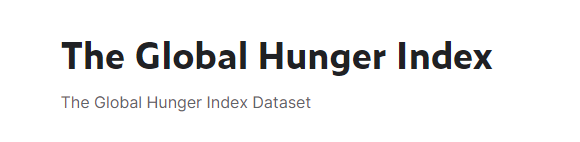

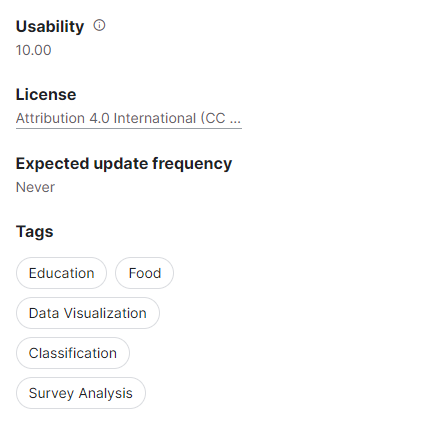

*Descriptive analytics- Relies solely on historical data to provide regular reports on events that have already happened.*

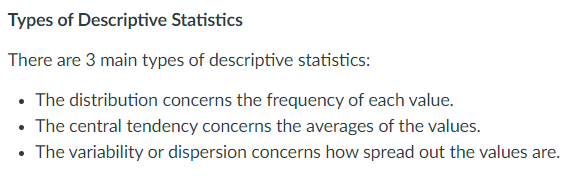

https://www.kaggle.com/datasets/whenamancodes/the-global-hunger-index/data

**The dataset I have retrieved has 4 csv files so I'll try to see how to make it into 1 dataset before starting**

In [ ]:
import pandas as pd

**I've used concat() to combine them all**

In [94]:
df1 = pd.read_csv('global-hunger-index.csv')
df2 = pd.read_csv('share-of-children-underweight.csv')
df3 = pd.read_csv('share-of-children-with-a-weight-too-low-for-their-height-wasting.csv')
df4 = pd.read_csv('share-of-children-younger-than-5-who-suffer-from-stunting.csv')
asean_df = pd.concat([df1, df2, df3, df4], axis=0)

In [95]:
asean_df

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations,"Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)","Prevalence of stunting, height for age (% of children under 5)"
0,Afghanistan,AFG,2000,50.9,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2006,42.7,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2012,34.3,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2021,28.3,NaN,NaN,NaN,NaN
4,Albania,ALB,2000,20.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
935,Zimbabwe,ZWE,2009,NaN,NaN,NaN,NaN,35.099998
936,Zimbabwe,ZWE,2010,NaN,NaN,NaN,NaN,32.200001
937,Zimbabwe,ZWE,2014,NaN,NaN,NaN,NaN,27.600000
938,Zimbabwe,ZWE,2015,NaN,NaN,NaN,NaN,27.100000


**Now, first I want to see the Southeast asian countries first.**

In [ ]:
asean = ['Brunei', 'Cambodia', 'East Timor', 'Indonesia', 'Laos',
    'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

In [96]:
asean_df = asean_df[asean_df['Entity'].isin(asean)]# including only ASEAN countries
asean_df


,Entity,Code,Year,Global Hunger Index (2021),411773-annotations,"Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)","Prevalence of stunting, height for age (% of children under 5)"
65,Cambodia,KHM,2000,41.1,NaN,NaN,NaN,NaN
66,Cambodia,KHM,2006,27.1,NaN,NaN,NaN,NaN
67,Cambodia,KHM,2012,24.2,NaN,NaN,NaN,NaN
68,Cambodia,KHM,2021,17.0,NaN,NaN,NaN,NaN
196,Indonesia,IDN,2000,26.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
911,Vietnam,VNM,2013,NaN,NaN,NaN,NaN,25.900000
912,Vietnam,VNM,2014,NaN,NaN,NaN,NaN,24.900000
913,Vietnam,VNM,2015,NaN,NaN,NaN,NaN,24.600000
914,Vietnam,VNM,2016,NaN,NaN,NaN,NaN,24.299999


In [131]:
asean_df.to_csv('asean.csv')#I'm saving just incase

In [132]:
asean_df.dtypes

Entity                                                                object
Code                                                                  object
Year                                                                   int64
ASEAN Hunger Index                                                   float64
Prevalence of underweight, weight for age (% of children under 5)    float64
Prevalence of wasting, weight for height (% of children under 5)     float64
Prevalence of stunting, height for age (% of children under 5)       float64
encoded_column                                                         int64
dtype: object

**Trying to see the unique Entity/Code**

In [133]:
code = asean_df['Code'].unique()
code

array(['KHM', 'IDN', 'LAO', 'MYS', 'MMR', 'PHL', 'THA', 'VNM', 'BRN',
       'SGP'], dtype=object)

**Adding a column for the 'Code' that is related to the Entity (e.g: Cambodia:1, Indonesia:2,...)**

In [134]:
def label(asean_df):
    mapping = {code: index + 1 for index, code in enumerate(asean_df['Code'].unique())}
    asean_df['encoded_column'] = asean_df['Code'].map(mapping)
    return asean_df
asean_df = asean_df[asean_df['Entity'].isin(asean)]
asean_df = label(asean_df)
asean_df

,Entity,Code,Year,ASEAN Hunger Index,"Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)","Prevalence of stunting, height for age (% of children under 5)",encoded_column
0,Cambodia,KHM,2000,41.1,NaN,NaN,NaN,1
1,Cambodia,KHM,2006,27.1,NaN,NaN,NaN,1
2,Cambodia,KHM,2012,24.2,NaN,NaN,NaN,1
3,Cambodia,KHM,2021,17.0,NaN,NaN,NaN,1
4,Indonesia,IDN,2000,26.1,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...
270,Vietnam,VNM,2013,NaN,NaN,NaN,25.900000,8
271,Vietnam,VNM,2014,NaN,NaN,NaN,24.900000,8
272,Vietnam,VNM,2015,NaN,NaN,NaN,24.600000,8
273,Vietnam,VNM,2016,NaN,NaN,NaN,24.299999,8


In [99]:
asean_df = asean_df.drop(columns=['411773-annotations'])

In [100]:
asean_df.dtypes

Entity                                                                object
Code                                                                  object
Year                                                                   int64
Global Hunger Index (2021)                                           float64
Prevalence of underweight, weight for age (% of children under 5)    float64
Prevalence of wasting, weight for height (% of children under 5)     float64
Prevalence of stunting, height for age (% of children under 5)       float64
encoded_column                                                         int64
dtype: object

**This creates a new encoded column in the ASEAN DataFrame, assigning a unique numerical value to each unique code from the 'Code' column, starting from 1.**

In [ ]:
mapping = {code: index + 1 for index, code in enumerate(asean_df['Code'].unique())}
asean_df['encoded_column'] = asean_df['Code'].map(mapping)
asean_df

<ipython-input-70-d047ba54b851>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asean_df['encoded_column'] = asean_df['Code'].map(mapping)


,Entity,Code,Year,Global Hunger Index (2021),"Prevalence of underweight, weight for age (% of children under 5)",encoded_column
65,Cambodia,KHM,2000,41.1,39.700001,1
66,Cambodia,KHM,2006,27.1,NaN,1
67,Cambodia,KHM,2012,24.2,NaN,1
68,Cambodia,KHM,2021,17.0,NaN,1
196,Indonesia,IDN,2000,26.1,24.799999,2
...,...,...,...,...,...,...
1536,Vietnam,VNM,2013,NaN,15.300000,8
1537,Vietnam,VNM,2014,NaN,14.500000,8
1538,Vietnam,VNM,2015,NaN,14.100000,8
1539,Vietnam,VNM,2016,NaN,13.800000,8


In [ ]:
asean_df.describe()

,Year,Global Hunger Index (2021),"Prevalence of underweight, weight for age (% of children under 5)",encoded_column
count,113.000000,32.000000,92.000000,113.000000
mean,2005.035398,22.143750,23.316304,4.876106
std,9.678704,8.625279,8.534845,2.431684
min,1987.000000,11.700000,3.300000,1.000000
25%,1998.000000,15.850000,17.700001,3.000000
50%,2006.000000,20.450000,22.650001,5.000000
75%,2012.000000,26.150000,29.225000,7.000000
max,2021.000000,44.100000,42.599998,10.000000


# **Plotting**

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

**Renaming the Global Hunger Index since It aint Global no more**

In [101]:
asean_df.rename(columns={'Global Hunger Index (2021)': 'ASEAN Hunger Index'}, inplace=True)
print(asean_df)

        Entity Code  Year  ASEAN Hunger Index  \
65    Cambodia  KHM  2000                41.1   
66    Cambodia  KHM  2006                27.1   
67    Cambodia  KHM  2012                24.2   
68    Cambodia  KHM  2021                17.0   
196  Indonesia  IDN  2000                26.1   
..         ...  ...   ...                 ...   
911    Vietnam  VNM  2013                 NaN   
912    Vietnam  VNM  2014                 NaN   
913    Vietnam  VNM  2015                 NaN   
914    Vietnam  VNM  2016                 NaN   
915    Vietnam  VNM  2017                 NaN   

     Prevalence of underweight, weight for age (% of children under 5)  \
65                                                 NaN                   
66                                                 NaN                   
67                                                 NaN                   
68                                                 NaN                   
196                                      

**This shows positive progress, with all represented ASEAN countries reducing their hunger index scores over the 20-year period. The data suggests successful efforts in combating hunger in the region.**

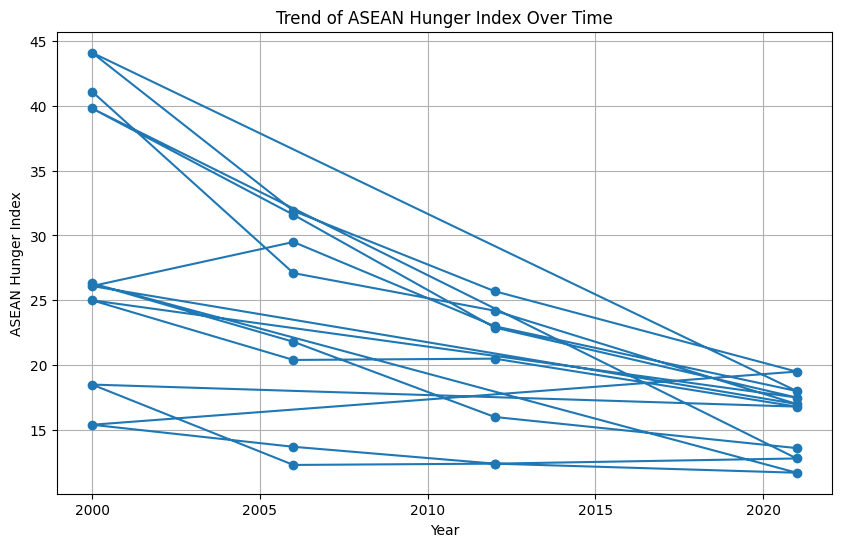

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(asean_df['Year'], asean_df['ASEAN Hunger Index'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('ASEAN Hunger Index')
plt.title('Trend of ASEAN Hunger Index Over Time')
plt.grid(True)
plt.show()

**There is one particular country's trend line that starts at a Hunger Index of around 35 in the year 2000 and shows a significant decrease, dropping below the 20 mark by around 2015 and continuing to decline to approximately 15 by 2020. This specific line demonstrates one of the steepest and most consistent declines in the Hunger Index among the displayed countries, indicating substantial improvement in reducing hunger over the 20-year period for that country.**

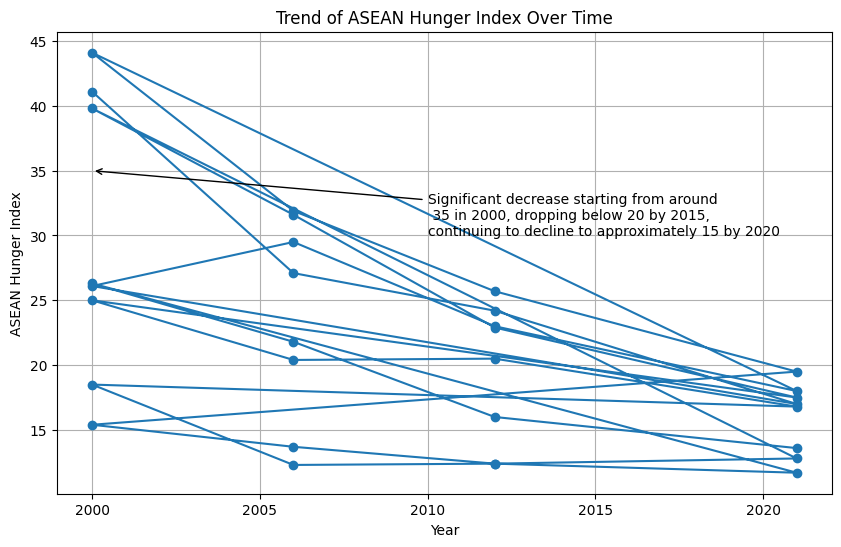

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(asean_df['Year'], asean_df['ASEAN Hunger Index'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('ASEAN Hunger Index')
plt.title('Trend of ASEAN Hunger Index Over Time')
plt.grid(True)
plt.annotate('Significant decrease starting from around\n 35 in 2000, dropping below 20 by 2015,\ncontinuing to decline to approximately 15 by 2020',
             xy=(2000, 35),  # Position of the arrow tip (x, y)
             xytext=(2010, 30),  # Position of the text label (x, y)
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10,
             horizontalalignment='left')
plt.show()

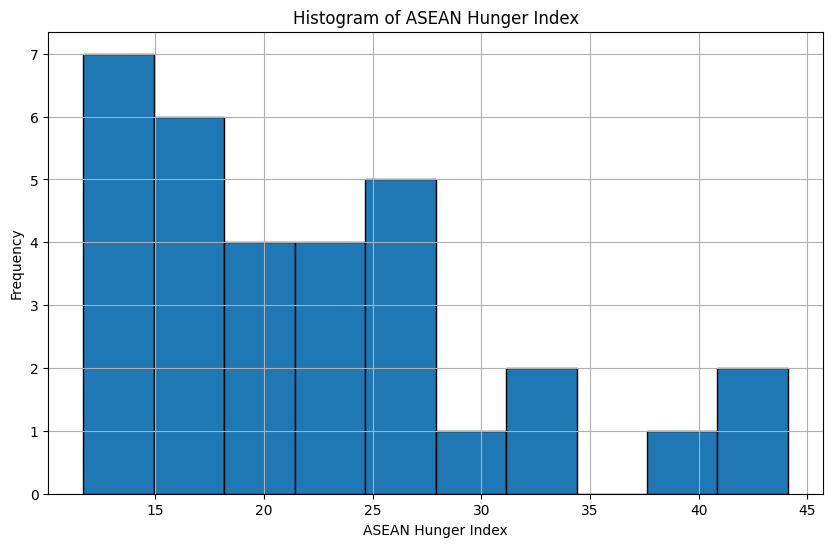

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(asean_df['ASEAN Hunger Index'], bins=10, edgecolor='black')
plt.xlabel('ASEAN Hunger Index')
plt.ylabel('Frequency')
plt.title('Histogram of ASEAN Hunger Index')
plt.grid(True)
plt.show()

 **This provides a more static view of the situation at a specific time, showing that most ASEAN countries have an index score on the lower end of the scale, which is a positive indication regarding the fight against hunger in the region.**

In [ ]:
asean_df['Entity'].unique()

array(['Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar',
       'Philippines', 'Thailand', 'Vietnam', 'Brunei', 'Singapore'],
      dtype=object)

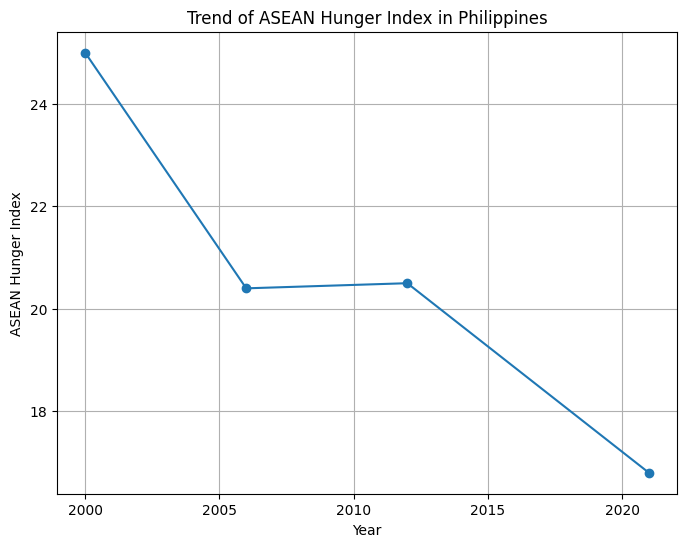

In [ ]:
def plot(country_name, df):
    country_df = df[df['Entity'] == country_name]
    plt.figure(figsize=(8, 6))
    plt.plot(country_df['Year'], country_df['ASEAN Hunger Index'], marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('ASEAN Hunger Index')
    plt.title(f'Trend of ASEAN Hunger Index in {country_name}')
    plt.grid(True)
    plt.show()
plot('Philippines', asean_df)

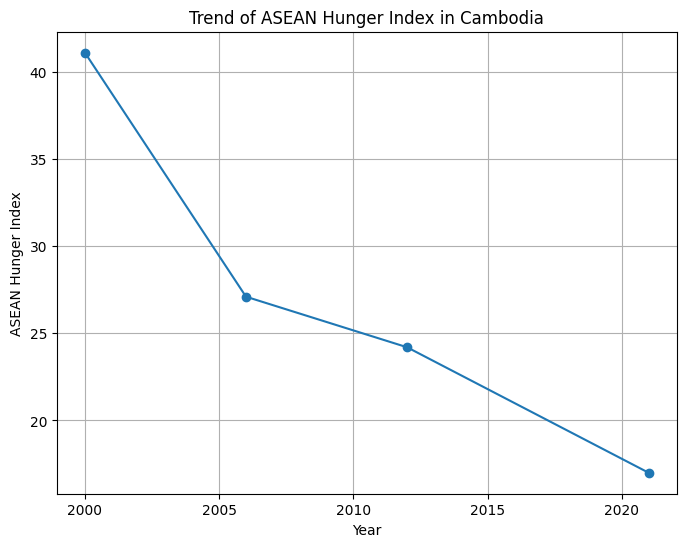

In [ ]:
plot('Cambodia', asean_df)

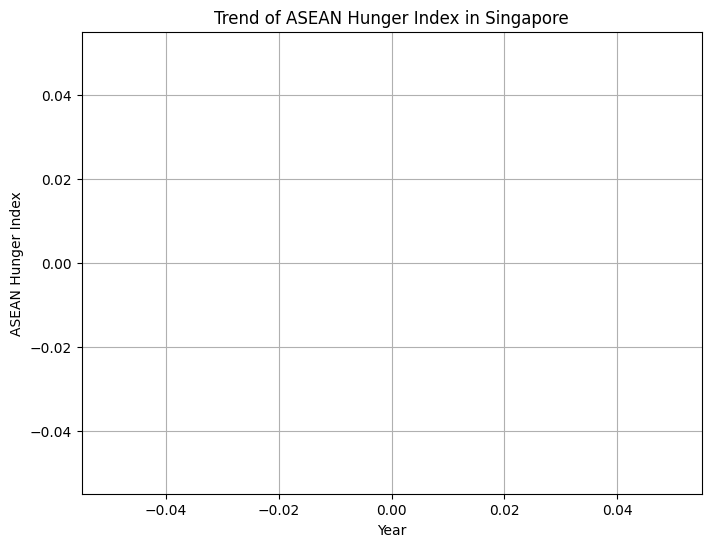

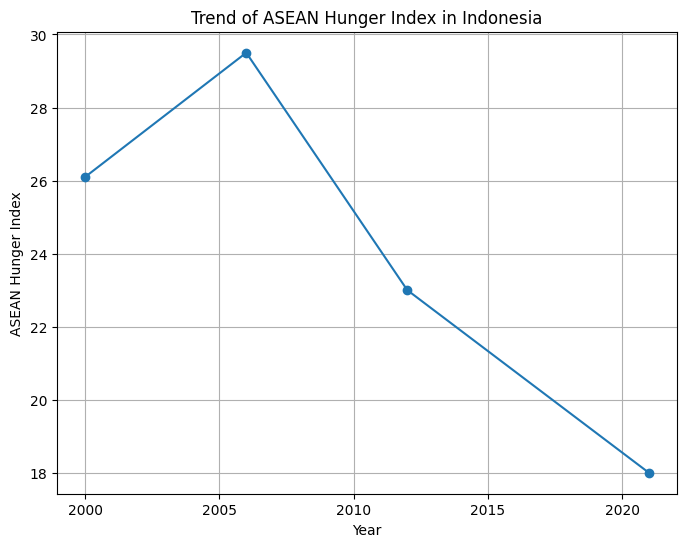

In [ ]:
plot('Singapore', asean_df)
plot('Indonesia', asean_df)


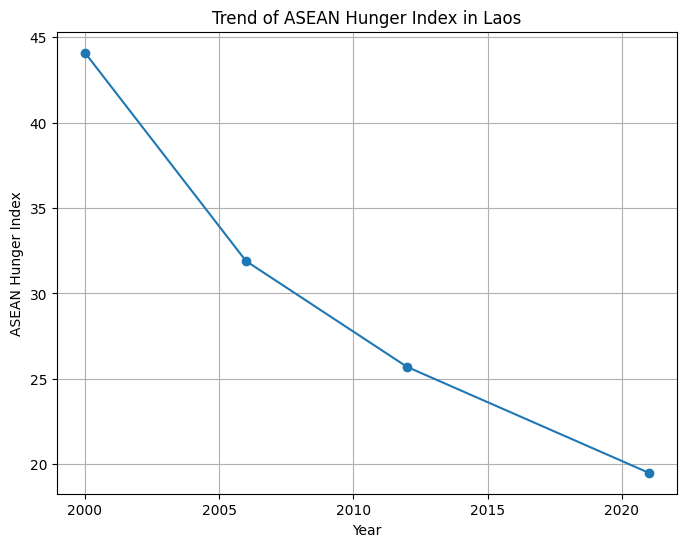

In [ ]:
plot('Laos', asean_df)

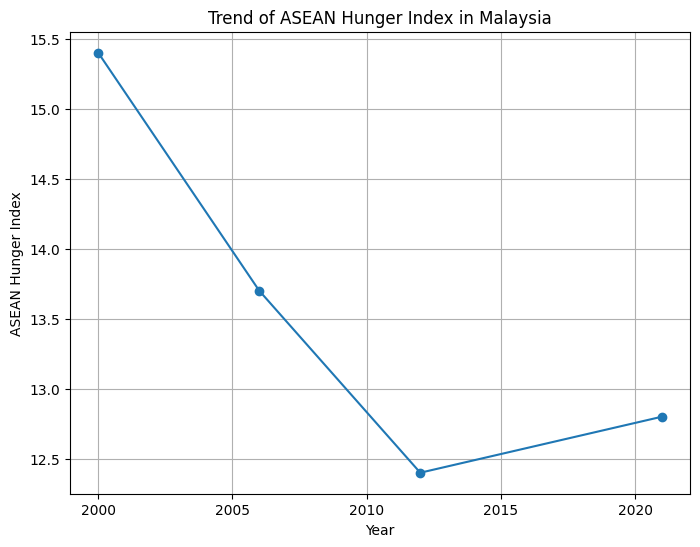

In [ ]:
plot('Malaysia', asean_df)
plot('Vietnam', asean_df)

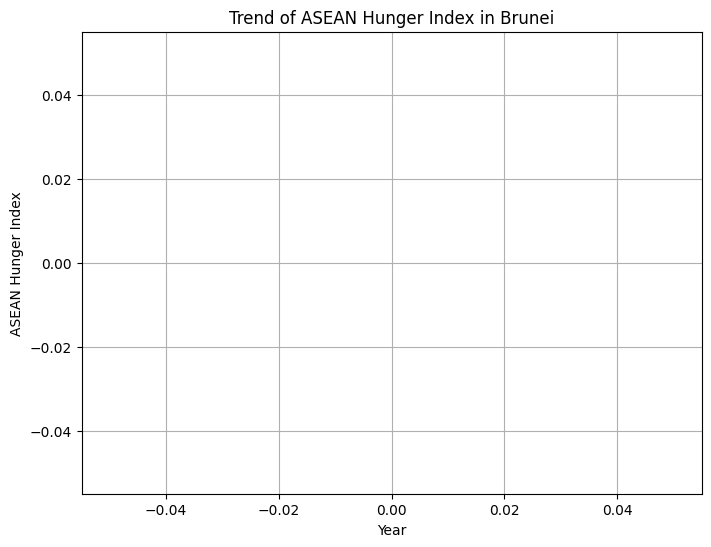

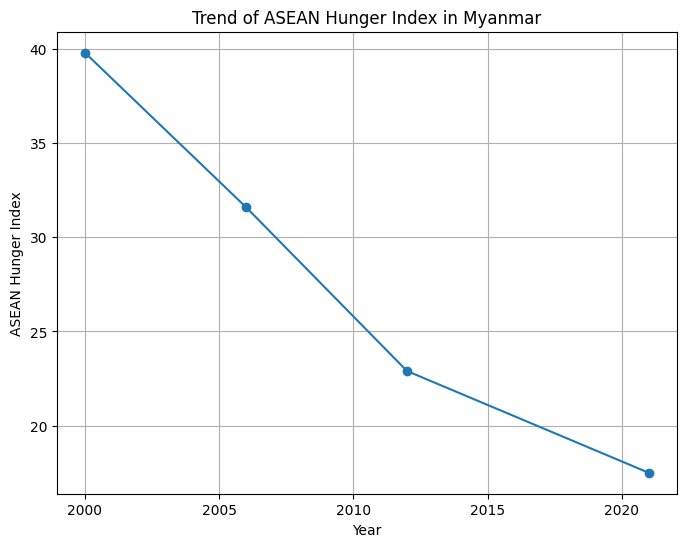

In [ ]:
plot('Brunei', asean_df)
plot('Myanmar', asean_df)

**We observe distinct trends in the plots for each 'entity', showcasing varied declines and inclines over time.**

In [ ]:
asean_df

,Entity,Code,Year,ASEAN Hunger Index,"Prevalence of underweight, weight for age (% of children under 5)",encoded_column
65,Cambodia,KHM,2000,41.1,39.700001,1
66,Cambodia,KHM,2006,27.1,NaN,1
67,Cambodia,KHM,2012,24.2,NaN,1
68,Cambodia,KHM,2021,17.0,NaN,1
196,Indonesia,IDN,2000,26.1,24.799999,2
...,...,...,...,...,...,...
1536,Vietnam,VNM,2013,NaN,15.300000,8
1537,Vietnam,VNM,2014,NaN,14.500000,8
1538,Vietnam,VNM,2015,NaN,14.100000,8
1539,Vietnam,VNM,2016,NaN,13.800000,8


checking...

In [112]:
asean_df.columns

Index(['Entity', 'Code', 'Year', 'ASEAN Hunger Index',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Prevalence of wasting, weight for height (% of children under 5)',
       'Prevalence of stunting, height for age (% of children under 5)',
       'encoded_column'],
      dtype='object')

<Axes: xlabel='Prevalence of underweight, weight for age (% of children under 5)', ylabel='Year'>

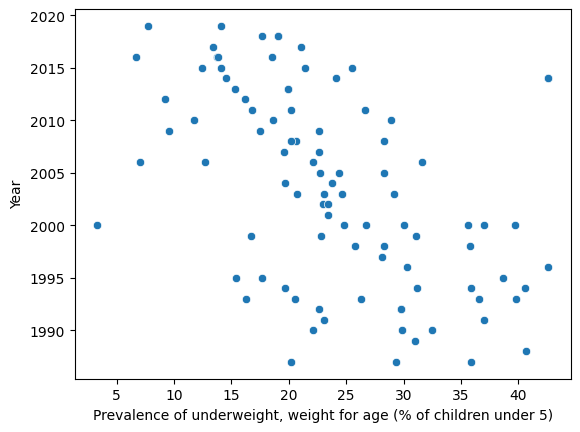

In [108]:
sns.scatterplot(x='Prevalence of underweight, weight for age (% of children under 5)',y='Year',data=asean_df)

**This scatter plot shows the prevalence of underweight children under 5 years of age across different years, from 1990 to 2020. There is a noticeable cluster of data points with higher percentages of underweight children in the early years, and a general trend towards lower percentages as time progresses, indicating an improvement in child nutrition over the 30-year span.**

<Axes: xlabel='Prevalence of wasting, weight for height (% of children under 5)', ylabel='Year'>

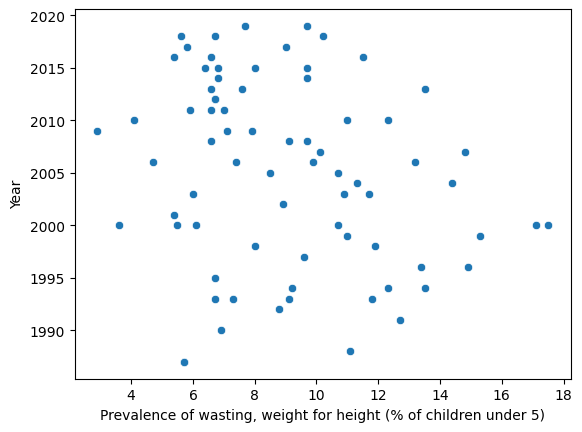

In [119]:
sns.scatterplot(x='Prevalence of wasting, weight for height (% of children under 5)',y='Year',data=asean_df)

**This scatter plot illustrates the prevalence of wasting (weight for height) among children under 5 years old from 1990 to 2020. The data points, which are more densely packed in the early years with higher wasting percentages, appear to be more spread out and generally lower in more recent years, suggesting a decrease in the prevalence of wasting among children in this age group over time.**

<Axes: xlabel='Prevalence of stunting, height for age (% of children under 5)', ylabel='Year'>

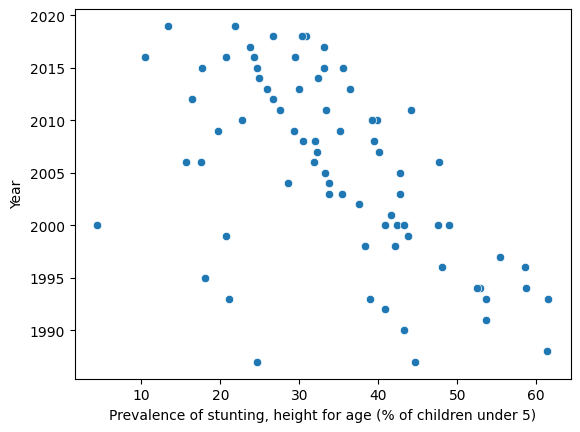

In [120]:
sns.scatterplot(x='Prevalence of stunting, height for age (% of children under 5)',y='Year',data=asean_df)

**The scatter plot shows a decreasing trend in the prevalence of stunting (height for age) in children under 5 from 1990 to 2020, with the highest concentrations of stunting occurring in the early 2000s.**

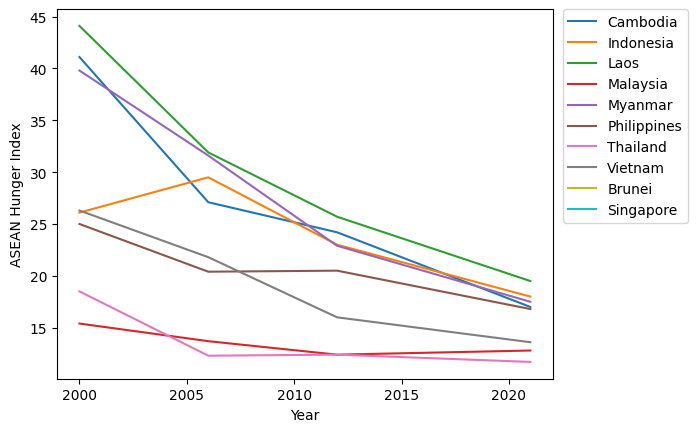

In [124]:
sns.lineplot(data=asean_df, x="Year", y='ASEAN Hunger Index', hue="Entity")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

**The graph compares the progress of different ASEAN countries in reducing hunger over two decades, showcasing varied rates of improvement and guiding targeted efforts to address food security.**

<ipython-input-115-b684df5b9112>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity', y='Prevalence of underweight, weight for age (% of children under 5)', data=asean_df, palette=entity_colors,)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cambodia'),
  Text(1, 0, 'Indonesia'),
  Text(2, 0, 'Laos'),
  Text(3, 0, 'Malaysia'),
  Text(4, 0, 'Myanmar'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'Thailand'),
  Text(7, 0, 'Vietnam'),
  Text(8, 0, 'Brunei'),
  Text(9, 0, 'Singapore')])

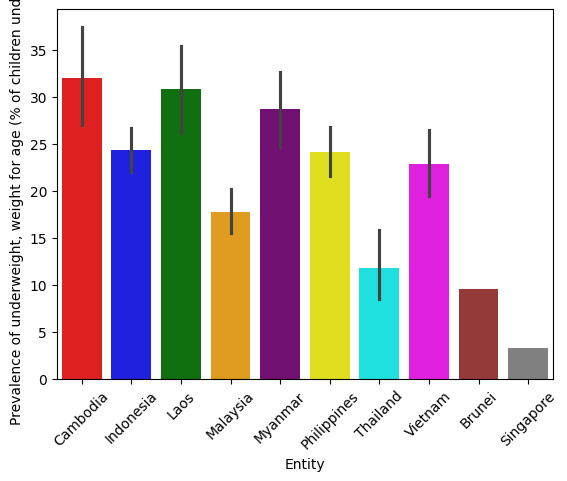

In [115]:
entity_colors = {
    'Cambodia': 'red',
    'Indonesia': 'blue',
    'Laos': 'green',
    'Malaysia': 'orange',
    'Myanmar': 'purple',
    'Philippines': 'yellow',
    'Thailand': 'cyan',
    'Vietnam': 'magenta',
    'Brunei': 'brown',
    'Singapore': 'gray'
}
sns.barplot(x='Entity', y='Prevalence of underweight, weight for age (% of children under 5)', data=asean_df, palette=entity_colors,)
plt.xticks(rotation=45)

**This bar chart displays the prevalence of underweight children under 5 years old across various ASEAN countries, with error bars likely indicating the confidence interval or data variability. The chart clearly shows that some countries face more significant challenges with child undernutrition than others, with Cambodia having the highest prevalence and Singapore the lowest within the region.**

<Axes: ylabel='Entity'>

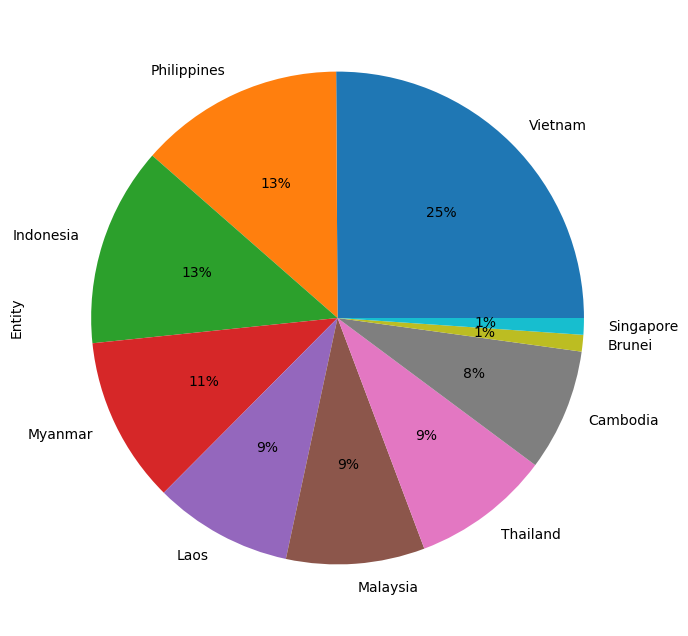

In [118]:
plt.figure(figsize=(8,8))
asean_df['Entity'].value_counts().plot(kind='pie', autopct='%1.0f%%')

**This pie chart presents the proportional distribution of a certain metric among ASEAN countries, with Vietnam having the largest share at 25%, followed by Indonesia and the Philippines each with 13%. Brunei and Singapore have the smallest shares, at 1% each. The metric in question is not specified but could represent a data point such as GDP contribution, population, or another significant factor within the ASEAN context.**

In [125]:
x = asean_df.corr()
x

<ipython-input-125-0239b1227b6b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = asean_df.corr()


,Year,ASEAN Hunger Index,"Prevalence of underweight, weight for age (% of children under 5)","Prevalence of wasting, weight for height (% of children under 5)","Prevalence of stunting, height for age (% of children under 5)",encoded_column
Year,1.000000,-0.583112,-0.600501,-0.229166,-0.572108,-0.012569
ASEAN Hunger Index,-0.583112,1.000000,NaN,NaN,NaN,-0.392317
"Prevalence of underweight, weight for age (% of children under 5)",-0.600501,NaN,1.000000,NaN,NaN,-0.331251
"Prevalence of wasting, weight for height (% of children under 5)",-0.229166,NaN,NaN,1.000000,NaN,-0.478396
"Prevalence of stunting, height for age (% of children under 5)",-0.572108,NaN,NaN,NaN,1.000000,-0.343266
encoded_column,-0.012569,-0.392317,-0.331251,-0.478396,-0.343266,1.000000


<Axes: >

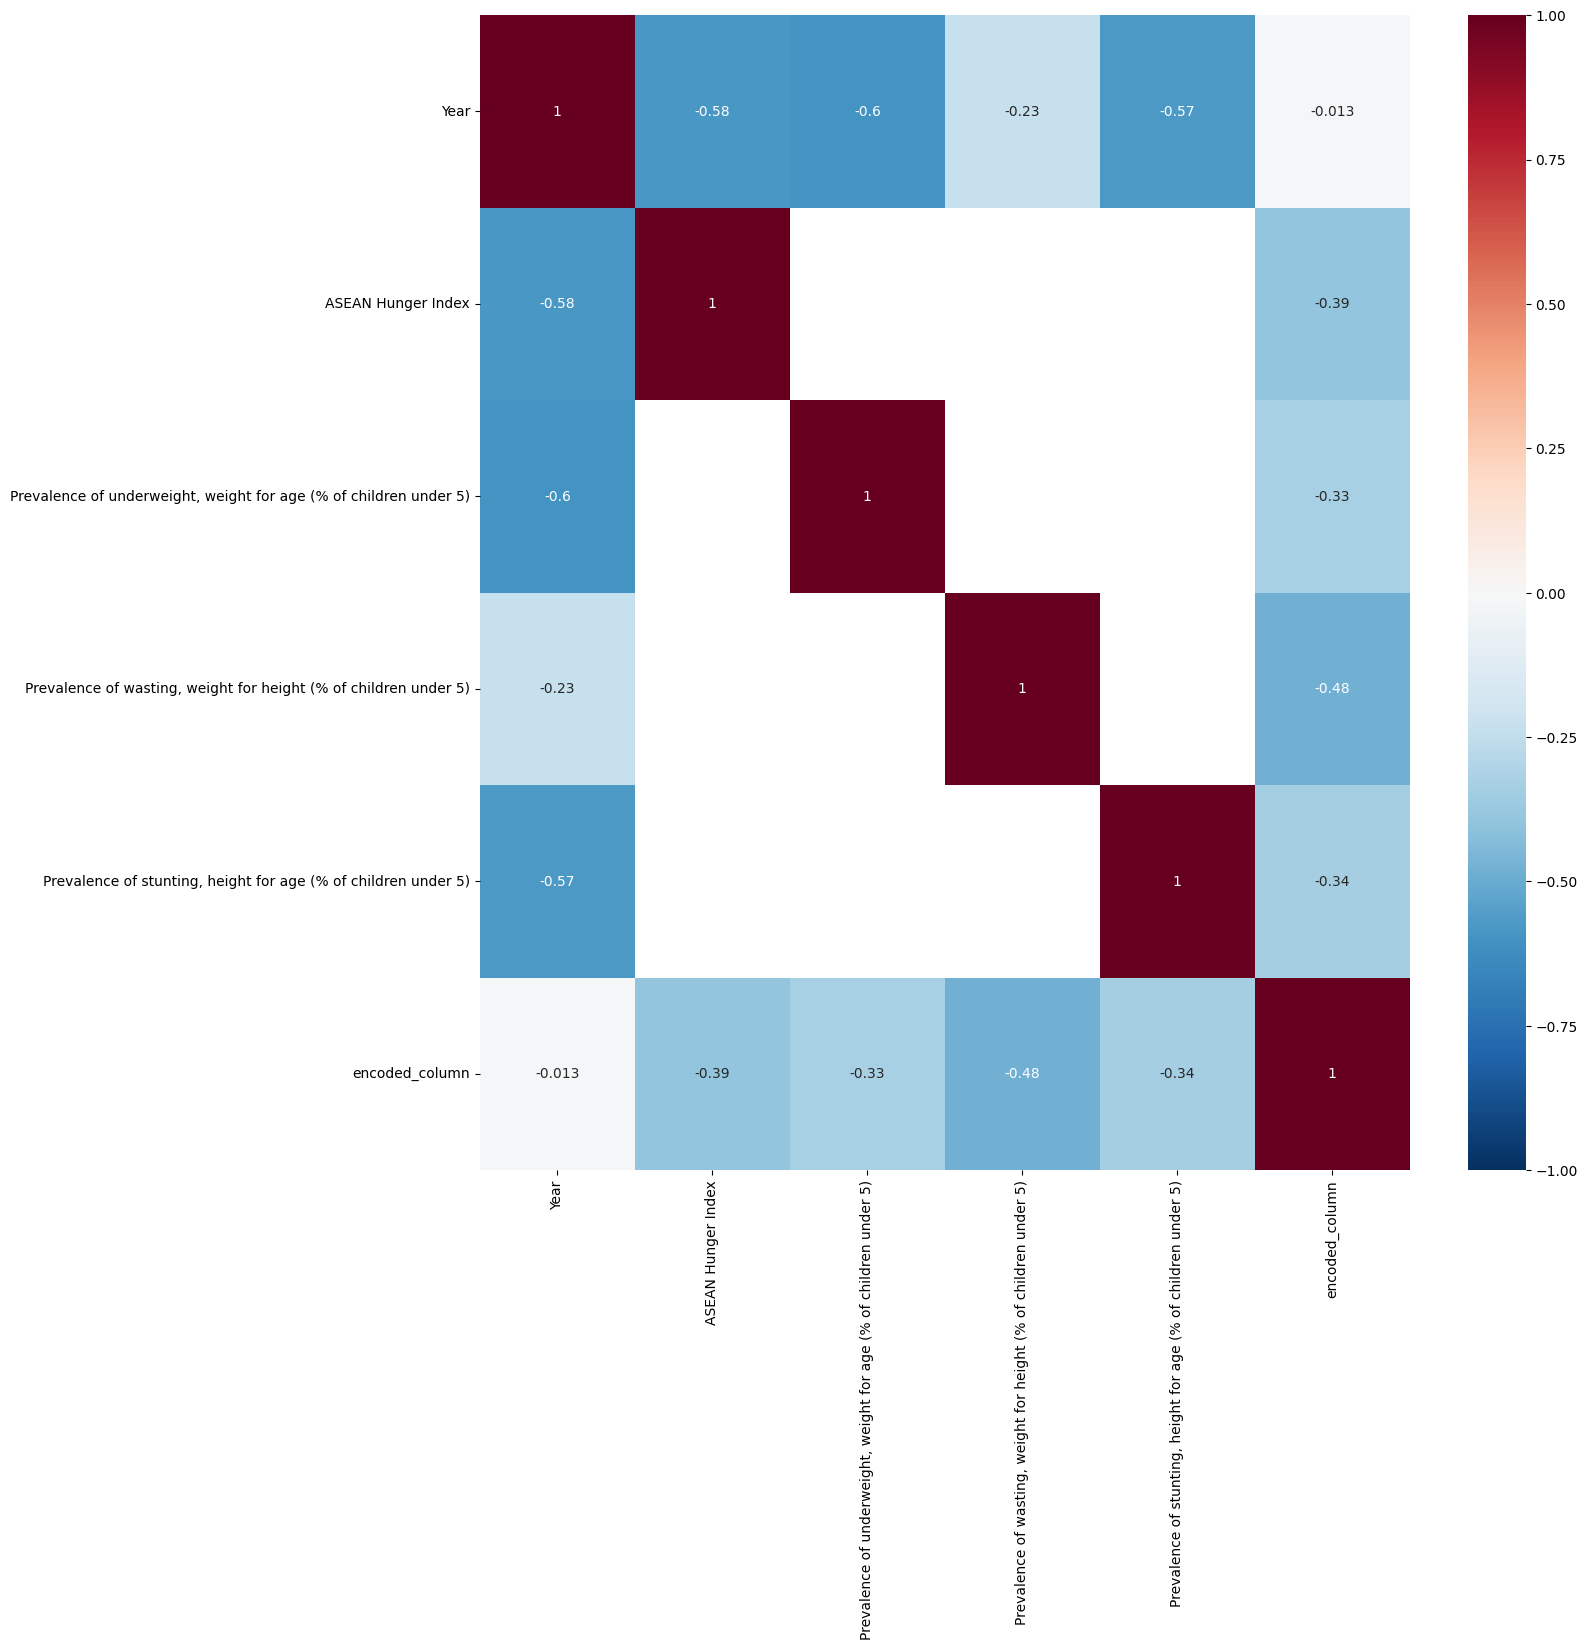

In [126]:
plt.figure(figsize=(15,15))
sns.heatmap(x, vmin = -1.0, vmax = 1.0, annot=True, cmap = 'RdBu_r')

**The heatmap visualizes the correlations between different child health indicators and the ASEAN Hunger Index over time, with stronger colors indicating stronger relationships, such as a high positive correlation between hunger index scores and underweight prevalence in children.**

#Conclusion

`Throughout this activity, I've gained a deeper understanding of the challenges and progress in addressing hunger and child malnutrition in the ASEAN region. By analyzing a range of data visualizations, I observed the notable declines in the ASEAN Hunger Index and improvements in the health of children under five. The diversity in the data—spanning line graphs to heatmaps—allowed me to explore the multifaceted nature of hunger and health, revealing both broad regional trends and specific national narratives. While the trend is positive overall, my analysis also uncovered persistent disparities among countries. This comprehensive examination not only enhanced my analytical skills but also highlighted the interconnectedness of regional cooperation and individual country policies in overcoming nutritional challenges.`